<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Student: Tim Köhne 
* Matriculation number: 11147022
* Date: 28.10.2025

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [3]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

# Load the datasets

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "burnoutminer/heights-and-weights-dataset",
   "SOCR-HeightWeight.csv",
)

dataset_0 = df["Height(Inches)"]
dataset_1 = df["Weight(Pounds)"]


df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
     "andrewmvd/heart-failure-clinical-data",
     "heart_failure_clinical_records_dataset.csv"
)

dataset_2 = df["creatinine_phosphokinase"]


# Visualize Clusters

In [25]:
import matplotlib.pyplot as plt
def visualize_clusters(dataset, clusters):
    plt.figure(figsize=(8, 2))  # wide figure for 1D data
    for cluster_label in set(clusters):
        mask = clusters == cluster_label
        if cluster_label == -1:
            # outliers in red
            plt.scatter(dataset[mask], [0]*sum(mask), color='red', label='Outlier', s=100, edgecolor='k')
        else:
            plt.scatter(dataset[mask], [0]*sum(mask), label=f'Cluster {cluster_label}', s=100, edgecolor='k')

    plt.yticks([])  # hide y-axis (not meaningful in 1D)
    plt.xlabel('Value')
    plt.title('DBSCAN Clustering (1D)')
    plt.subplots_adjust(right=0.8)  # leave space on the right for the legend
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Task 4: Cluster the datasets

7


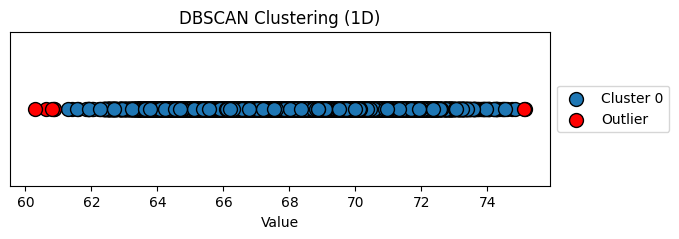

In [53]:
minPts = 5
eps = 0.3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
X = dataset_0.values.reshape(-1, 1)
clusters = outlier_detection.fit_predict(X)

print(list(clusters).count(-1))
visualize_clusters(X, clusters)

7


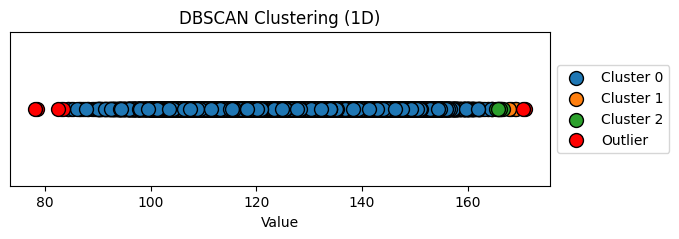

In [44]:
minPts = 3
eps = 0.7

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
X = dataset_1.values.reshape(-1, 1)
clusters = outlier_detection.fit_predict(X)

print(list(clusters).count(-1))
visualize_clusters(X, clusters)

8


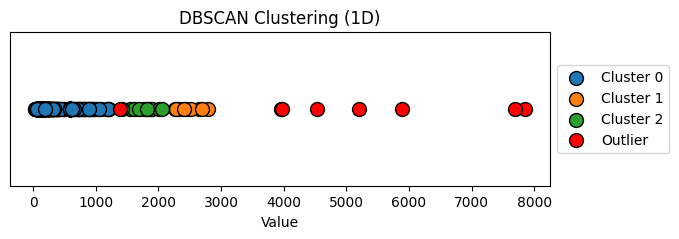

In [49]:
minPts = 4
eps = 150

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)
X = dataset_2.values.reshape(-1, 1)
clusters = outlier_detection.fit_predict(X)

print(list(clusters).count(-1))
visualize_clusters(X, clusters)

minPts should be based on domain knowledge. In this case it was looking at the density of values.
eps was determined based on the domain of values.
trial and error with visualizing it was useful.